In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import ipywidgets as wd
import matplotlib.animation as animation
%matplotlib widget

In [3]:
def circle(theta):
    x = 100*np.cos(theta)
    y = 100*np.sin(theta)

    return x, y

def rCircle(theta):
    R = 100
    x0 = -200
    return np.sqrt(R**2 - 2*x0*R*np.cos(theta) + x0**2)

def rCirclePrime(theta):
    R = 100
    x0 = -200
    sDot = 7
    return x0*np.sin(theta)*sDot/rCircle(theta)

MovieWriter Pillow unavailable; using Pillow instead.


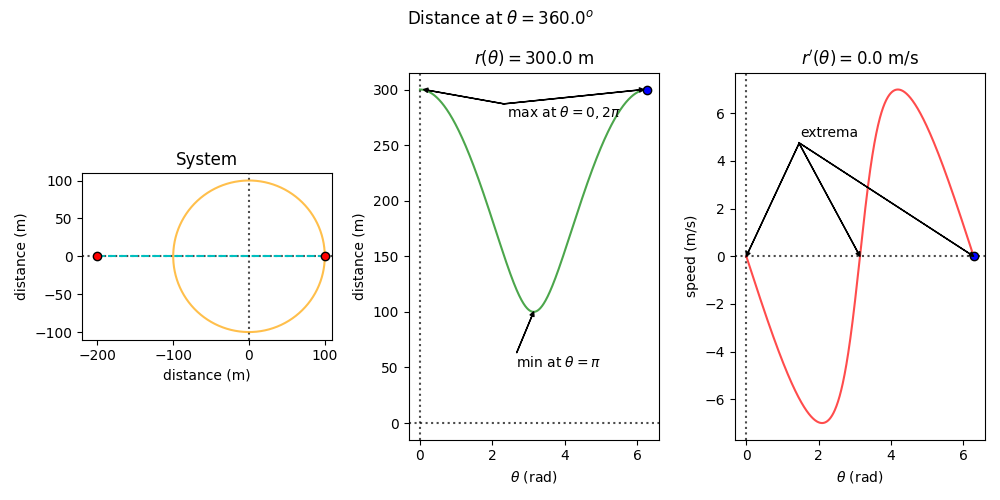

In [7]:
""""
Now for the annimations.
"""

#define the angles for the circle
theta = np.linspace(0, 2*np.pi, 1000)

#calculate circle
x, y = circle(theta)

#define the coordinates for the center of the 
#circle, a point on the circle, and the friend 200 m 
#away

x0 = 0
y0 = 0
xf = -200
yf = 0

thetaC = 104.477*np.pi/180
xc, yc = circle(thetaC)

#define the theta for the annimation
thetaAni = np.linspace(0, 2*np.pi, 120)

#evaluate all functions 
xAni, yAni = circle(thetaAni)
rThetaAni = rCircle(thetaAni)
rPThetaAni = rCirclePrime(thetaAni)

fig, ax = plt.subplots(1,3, figsize=(10,5))

#plot all static elements
for a in ax:
    a.axhline(0, ls=':', color='k', alpha=0.7)
    a.axvline(0, ls=':', color='k', alpha=0.7)
   



#plot the circle
ax[0].plot(x, y, color='orange', alpha=0.7)
ax[0].set_xlabel('distance (m)')
ax[0].set_ylabel('distance (m)')
ax[0].set_xlim(-200*1.1, 100*1.1)
ax[0].set_ylim(-100*1.1, 100*1.1)

#now plot the distance r(theta)
ax[1].plot(theta, rCircle(theta), color='g', alpha=0.7)

#now the speed
ax[2].plot(theta, rCirclePrime(theta), color='r', alpha=0.7)

#axis labels
ax[1].set_xlabel('$\\theta$ (rad)')
ax[1].set_ylabel('distance (m)')

ax[2].set_xlabel('$\\theta$ (rad)')
ax[2].set_ylabel('speed (m/s)')

#now add the annotations
ax[1].annotate(
    'min at $\\theta = \\pi$', 
    xy=(np.pi, 100), 
    xytext=(np.pi-.5, 50), 
    arrowprops=dict(facecolor='black', width=0.1,
                    headwidth=3, headlength=3)
)

ax[1].annotate(
    'max at $\\theta = 0, 2\\pi$', 
    xy=(.1, 300), 
    xytext=(np.pi-.75, 275), 
    arrowprops=dict(facecolor='black', width=0.1,
                    headwidth=3, headlength=3)
)

ax[1].annotate(
    '', 
    xy=(2*np.pi-.1, 300), 
    xytext=(np.pi-.85, 287), 
    arrowprops=dict(facecolor='black', width=0.1,
                    headwidth=3, headlength=3)
)

ax[2].annotate(
    'extrema', 
    xy=(0,0),
    xytext=(1.5,5),
    arrowprops=dict(facecolor='black', width=0.1,
                    headwidth=3, headlength=3)
)

ax[2].annotate(
    '', 
    xy=(np.pi,0),
    xytext=(1.45,4.77),
    arrowprops=dict(facecolor='black', width=0.1,
                    headwidth=3, headlength=3)
)
ax[2].annotate(
    '', 
    xy=(2*np.pi,0),
    xytext=(1.45,4.77),
    arrowprops=dict(facecolor='black', width=0.1,
                    headwidth=3, headlength=3)
)


#create empty repositories for frames

title0 = fig.suptitle("")
title1 = ax[0].set_title("")
title2 = ax[1].set_title("")
title3 = ax[2].set_title("")

#empty arrays to update coordinate positions
coor0, = ax[0].plot([], [], color='c',
                    marker='o', markerfacecolor='r',
                    markeredgecolor='k', ls='--')
coor1, = ax[1].plot([], [], color='c',
                    marker='o', markerfacecolor='b',
                    markeredgecolor='k', ls='--')
coor2, = ax[2].plot([], [], color='c',
                    marker='o', markerfacecolor='b',
                    markeredgecolor='k', ls='--')

def update(i):

    thisx0 = [xf, xAni[i]]
    thisy0 = [yf, yAni[i]]
    thisTheta = [thetaAni[i]]
    thisr = [rThetaAni[i]]
    thisrp = [rPThetaAni[i]]

    coor0.set_data(thisx0, thisy0)
    coor1.set_data(thisTheta, thisr)
    coor2.set_data(thisTheta, thisrp)

    title0.set_text('Distance at $\\theta = {}^o$'.format(np.round(thisTheta[0]*180/np.pi, 2)))
    title1.set_text('System')
    title2.set_text("$r(\\theta) = {}$ m".format(np.round(rCircle(thisTheta[0]), 2))),
    title3.set_text("$r'(\\theta) = {}$ m/s".format(np.round(rCirclePrime(thisTheta[0]), 2)))

    fig.tight_layout()
    ax[0].set_aspect(1)
    ret = coor0, coor1, coor2, title0, title1, title2, title3

    return ret

ani = animation.FuncAnimation(
    fig, update, len(thetaAni), interval=167, blit=True
)

ani.save('track-circle-distance.gif', writer='Pillow', fps=30)